In [184]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

import importlib


import src.src_current_measurement_simulations_particle_sector
import src.src_current_measurement_simulations

importlib.reload(src.src_current_measurement_simulations_particle_sector)
importlib.reload(src.src_current_measurement_simulations)

from src.src_current_measurement_simulations_particle_sector import CurrentMeasurementSimulationParticleSector
from src.src_current_measurement_simulations_particle_sector import CurrentMeasurementSimulation

In [188]:
### 8 qubits

num_levels = 5
num_qubits = 8
num_particles = 4

# pi flux
J = -np.array([6.02, 6.26, 6.01, 6.23, 6.07, 6.36, 6.13]) * 2 * np.pi # MHz
J_parallel = -np.array([7.08, 7.33, 7.30, 7.70, 7.26, 7.01]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0, 0, 0, 0, 0]) * 2 * np.pi # MHz
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()

measurement_detuning = np.array([-200, -200, 500, 500, -100, -100, 300, 300]) * 2 * np.pi  # MHz
# measurement_detuning = np.array([300, 300, -300, -302]) * 2 * np.pi  # MHz


U = -180 * 2 * np.pi

T1 = 40  # 40 microseconds
T2 = 5  # 5 microseconds

# T1 = None
# T2 = None


times = np.linspace(0, 0.2, 101)  # microseconds
time_offset = 0

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]


psi0 = -1



In [194]:
print(current_simulation.measurement_Hamiltonian)

Quantum object: dims=[[330], [330]], shape=(330, 330), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-6785.84013175   -75.6495511      0.         ...     0.
      0.             0.        ]
 [  -75.6495511  -3392.92006588     0.         ...     0.
      0.             0.        ]
 [    0.             0.         -2261.94671058 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...  6660.17642561
    -39.96105855   -88.09025801]
 [    0.             0.             0.         ...   -39.96105855
   9173.45054848   -77.03185187]
 [    0.             0.             0.         ...   -88.09025801
    -77.03185187  5780.53048261]]


In [190]:
current_simulation = CurrentMeasurementSimulationParticleSector(
    num_levels=num_levels,
    num_qubits=num_qubits,
    num_particles=num_particles,
    J=J,
    J_parallel=J_parallel,
    U=U,
    times=times,
    readout_pair_1=readout_pair_1,
    readout_pair_2=readout_pair_2,
    initial_detunings=initial_detunings,
    measurement_detuning=measurement_detuning,
    measurement_J=measurement_J,
    measurement_J_parallel=measurement_J_parallel,
    psi0=psi0,
    time_offset=time_offset,
    T1=T1,
    T2=T2,
    print_logs=True
)

# current_simulation.run_simulation()

Number of basis states: 330
[(4, 0, 0, 0, 0, 0, 0, 0), (3, 1, 0, 0, 0, 0, 0, 0), (2, 2, 0, 0, 0, 0, 0, 0), (1, 3, 0, 0, 0, 0, 0, 0), (0, 4, 0, 0, 0, 0, 0, 0), (3, 0, 1, 0, 0, 0, 0, 0), (2, 1, 1, 0, 0, 0, 0, 0), (1, 2, 1, 0, 0, 0, 0, 0), (0, 3, 1, 0, 0, 0, 0, 0), (2, 0, 2, 0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 0, 0, 0), (0, 2, 2, 0, 0, 0, 0, 0), (1, 0, 3, 0, 0, 0, 0, 0), (0, 1, 3, 0, 0, 0, 0, 0), (0, 0, 4, 0, 0, 0, 0, 0), (3, 0, 0, 1, 0, 0, 0, 0), (2, 1, 0, 1, 0, 0, 0, 0), (1, 2, 0, 1, 0, 0, 0, 0), (0, 3, 0, 1, 0, 0, 0, 0), (2, 0, 1, 1, 0, 0, 0, 0), (1, 1, 1, 1, 0, 0, 0, 0), (0, 2, 1, 1, 0, 0, 0, 0), (1, 0, 2, 1, 0, 0, 0, 0), (0, 1, 2, 1, 0, 0, 0, 0), (0, 0, 3, 1, 0, 0, 0, 0), (2, 0, 0, 2, 0, 0, 0, 0), (1, 1, 0, 2, 0, 0, 0, 0), (0, 2, 0, 2, 0, 0, 0, 0), (1, 0, 1, 2, 0, 0, 0, 0), (0, 1, 1, 2, 0, 0, 0, 0), (0, 0, 2, 2, 0, 0, 0, 0), (1, 0, 0, 3, 0, 0, 0, 0), (0, 1, 0, 3, 0, 0, 0, 0), (0, 0, 1, 3, 0, 0, 0, 0), (0, 0, 0, 4, 0, 0, 0, 0), (3, 0, 0, 0, 1, 0, 0, 0), (2, 1, 0, 0, 1, 0, 0, 0), (1, 2, 0,

In [ ]:
H = current_simulation.measurement_Hamiltonian
print(f'H: {H.dims}')
psi0 = current_simulation.psi0

c_ops = [current_simulation.gamma_phi[i] * current_simulation.number_operators[i] for i in range(len(current_simulation.gamma_phi))]

print(f'psi0: {psi0.dims}')
for c_ops in c_ops:
    print(f'c_ops: {c_ops.dims}')

e_ops = current_simulation.number_operators
result = qt.mesolve(H, psi0, times, e_ops=e_ops, c_ops=c_ops, progress_bar=True)

H: [[330], [330]]
psi0: [[330], [1]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]
c_ops: [[330], [330]]


c:\Users\mattm\OneDrive\Desktop\Research\Software\venv\lib\site-packages\qutip\solver\solver_base.py:459: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(


MemoryError: Unable to allocate 177. GiB for an array with shape (330, 330, 330, 330) and data type complex128

(8, 501)


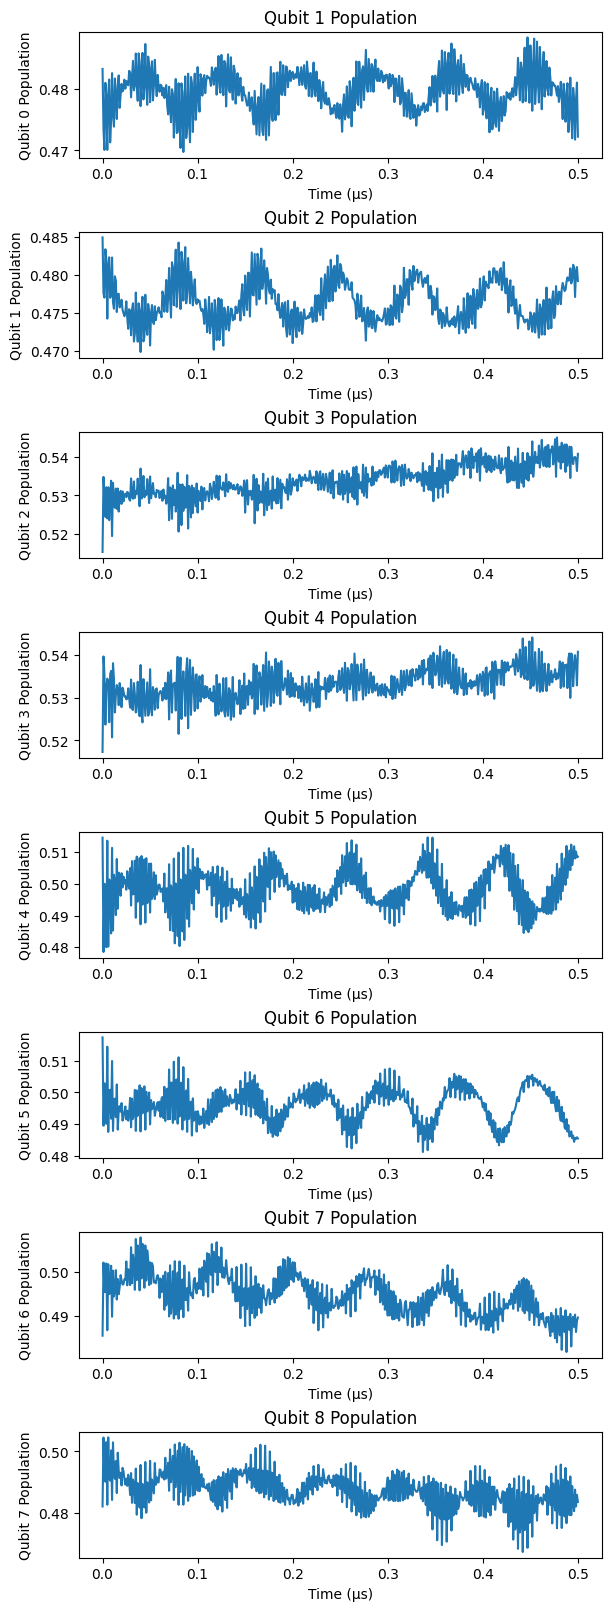

Text(0.5, 0, 'Time (μs)')

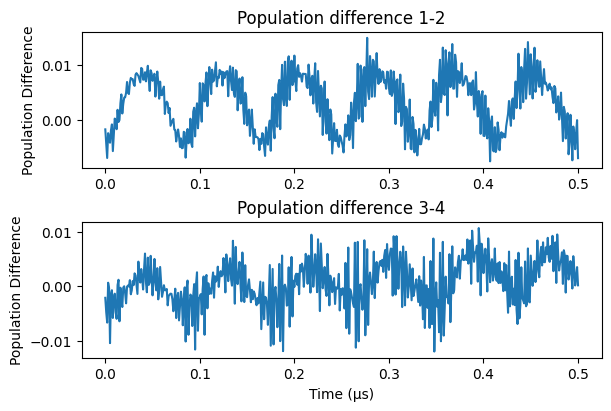

In [ ]:
readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

population = current_simulation.get_population_average()
print(population.shape)

fig, axs = plt.subplots(num_qubits, 1, figsize=(6, 2*num_qubits), constrained_layout=True)
for i in range(num_qubits):
    axs[i].plot(times, population[i,:], label=f'Qubit {i+1}')
    axs[i].set_ylabel(f'Qubit {i} Population')
    axs[i].set_xlabel('Time (μs)')
    axs[i].set_title(f'Qubit {i+1} Population')
plt.show()


population_differences = np.zeros((2, population.shape[1]))
population_differences[0, :] = population[readout_pair_1[0], :] - population[readout_pair_1[1], :]
population_differences[1, :] = population[readout_pair_2[0], :] - population[readout_pair_2[1], :]

fig, axs = plt.subplots(2, 1, figsize=(6, 4), constrained_layout=True)
for i in range(len(axs)):
    readout_pair = [readout_pair_1, readout_pair_2][i]
    axs[i].plot(times, population_differences[i, :])
    axs[i].set_ylabel('Population Difference')
    axs[i].set_title(f'Population difference {readout_pair[0]+1}-{readout_pair[1]+1}')
axs[-1].set_xlabel('Time (μs)')


In [187]:
covariance = current_simulation.get_covariance()
print(covariance.shape)

current_simulation.plot_covariance()


current_simulation.plot_covariance_sum()


running simulation
running mesolve


MemoryError: Unable to allocate 177. GiB for an array with shape (330, 330, 330, 330) and data type complex128

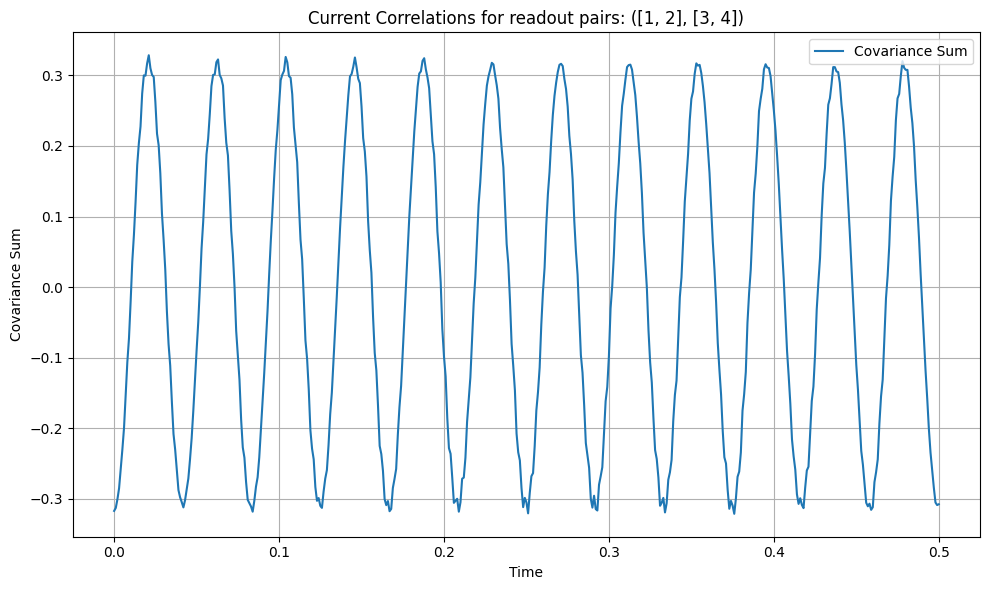